# Installation of Graphic pytorch

In [1]:
%reset -f

In [4]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python -c "import torch; print(torch.cuda.is_available())

1.2.0
10.0.130
/usr/bin/sh: -c: line 0: unexpected EOF while looking for matching `"'
/usr/bin/sh: -c: line 1: syntax error: unexpected end of file


In [2]:
 !nvcc --version

/usr/bin/sh: nvcc: command not found


In [3]:
!nvidia-smi 

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [5]:
# Installing torch geometric and its dependences
#!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
#!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
#!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
#!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
#!pip install torch-geometric

In [6]:
#List of installed packages
#!pip list -v 

In [5]:
import torch
print( torch.cuda.get_device_capability(device=None), \
'\n', torch.cuda.get_device_name(device=None), \
'\n', torch.cuda.get_device_properties(device=None), \
'\n', torch.cuda.device(1), \
'\n', torch.cuda.is_initialized(), \
 )

RuntimeError: cuda runtime error (38) : no CUDA-capable device is detected at /tmp/pip-req-build-p5q91txh/aten/src/THC/THCGeneral.cpp:50

In [8]:
import torch
device = torch.device('cuda')

# Data

In [9]:
#Defining the MDC wires as a grid with connected neighbours. 
#Each node on the border is connected vith 5 neighbores.
#Other vertices are connected with 8 neighbotrs.

import torch
from torch_geometric.data import Data
import numpy as np

cell = 43
layer = 43
x = np.arange(0, cell * layer)
edge_index = []

x = torch.tensor(x, dtype=torch.float).view(cell * layer, 1)

def wire(i, j):
  return layer * j + i
for i in range(cell):
  for j in range(layer):
    if i == 0:
      edge_index1 = [wire(i, j), wire(i + 1, j)]
      edge_index.extend([edge_index1])
      edge_index2 = [wire(i, j), wire(cell-1, j)]
      edge_index.extend([edge_index2])
      if j != layer - 1:
        edge_index3 = [wire(i, j), wire(cell-1, j + 1)]
        edge_index.extend([edge_index3])
        edge_index4 = [wire(i, j), wire(i + 1, j + 1)]
        edge_index.extend([edge_index4])
        edge_index13 = [wire(i, j), wire(i, j + 1)]
        edge_index.extend([edge_index13])        
      if j != 0:
        edge_index5 = [wire(i, j), wire(cell-1, j - 1)]
        edge_index.extend([edge_index5])
        edge_index6 = [wire(i, j), wire(i + 1, j - 1)]
        edge_index.extend([edge_index6])        
        edge_index14 = [wire(i, j), wire(i, j - 1)]
        edge_index.extend([edge_index14])
    else:
      edge_index7 = [wire(i, j), wire(i - 1, j)]
      edge_index.extend([edge_index7])
      edge_index8 = [wire(i, j), wire(((i + 1) % cell), j)]
      edge_index.extend([edge_index8])
      if j != layer - 1:
        edge_index9 = [wire(i, j), wire(i-1, j + 1)]
        edge_index.extend([edge_index9])
        edge_index10 = [wire(i, j), wire(((i + 1) % cell), j + 1)]
        edge_index.extend([edge_index10])
        edge_index15 = [wire(i, j), wire(i, j + 1)]
        edge_index.extend([edge_index15])
      if j != 0:
        edge_index11 = [wire(i, j), wire(i-1, j - 1)]
        edge_index.extend([edge_index11])
        edge_index12 = [wire(i, j), wire(((i + 1) % cell), j - 1)]
        edge_index.extend([edge_index12])
        edge_index16 = [wire(i, j), wire(i, j - 1)]
        edge_index.extend([edge_index16])


set_edge_index = {(i, j) for i, j in edge_index}
edge_index = list(set_edge_index)
edge_index = torch.tensor(edge_index, dtype=torch.long).view( (8 * cell * layer - 3 * (cell + layer)), 2).t().contiguous()
#edge_index = torch.tensor(edge_index, dtype=torch.long).view( 270, 2).t().contiguous()
data = Data(x=x, edge_index=edge_index)
data = data.to(device)
data

Data(edge_index=[2, 14534], x=[1849, 1])

In [10]:
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 1849
Number of edges: 14534
Average node degree: 7.86
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [11]:
print(x, '\n', edge_index)

tensor([[0.0000e+00],
        [1.0000e+00],
        [2.0000e+00],
        ...,
        [1.8460e+03],
        [1.8470e+03],
        [1.8480e+03]]) 
 tensor([[1605, 1687, 1365,  ..., 1602, 1729,  308],
        [1649, 1688, 1408,  ..., 1644, 1685,  265]])


In [12]:
#upload from local drive when conected to the local host
trainmatrix80d2tnbsmt = np.load('../../Research/jupyternotebook/bhabha-files/trainmatrix80d2tnbsmt.npy')
trvalmatrix80d2tnbsmt = np.load('../../Research/jupyternotebook/bhabha-files/trvalmatrix80d2tnbsmt.npy')

trainmatrix80d2tnbsmt = np.expand_dims(trainmatrix80d2tnbsmt, axis=3)
trvalmatrix80d2tnbsmt = np.expand_dims(trvalmatrix80d2tnbsmt, axis=3)

In [13]:
trvalmatrix80d2tnbsmt.shape

(80000, 43, 40, 1)

In [14]:
trainmatrix80d2tnbsmt.shape

(80000, 43, 40, 1)

In [15]:
trvalmatrix80d2tnbsmt.sum()

1703713.6

In [16]:
trainmatrix80d2tnbsmt.sum()

2792270.5

In [17]:
# Increasing the layers to 43 by adding zeros because the above graph definition works if dimensions are equal
a = trainmatrix80d2tnbsmt
b = trvalmatrix80d2tnbsmt
a_tra = np.zeros(shape=(80000, 43, 43, 1))#, dtype=torch.double)
b_trv = np.zeros(shape=(80000, 43, 43, 1))
a_tra[:a.shape[0], :a.shape[1], :a.shape[2]] = a
b_trv[:b.shape[0], :b.shape[1], :b.shape[2]] = b

In [18]:
a_tra.sum()

2792273.7036363333

In [19]:
b_trv.sum()

1703719.3713912368

In [20]:
a_tra.shape

(80000, 43, 43, 1)

In [21]:
b_trv.shape

(80000, 43, 43, 1)

In [22]:
a221 = a_tra.reshape(80000, 43,43)
a221[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
import matplotlib.pyplot as plt
#plt.matshow(a221[1])

In [24]:
'''TraEvN = 8000
xnodes = torch.tensor(np.zeros(shape=(TraEvN, 1849, 4)), dtype=torch.double).to(device)
for i in range(TraEvN):
    for j in range(1849):
        #node id
        xnodes[i][j][0] = j
        #cell
        xnodes[i][j][1] = j % 43
        #layer
        xnodes[i][j][2] = j // 43
        #normalized time
        xnodes[i][j][3] = a_tra.reshape(80000, 43, 43)[i][j % 43][j // 43]'''

'TraEvN = 8000\nxnodes = torch.tensor(np.zeros(shape=(TraEvN, 1849, 4)), dtype=torch.double).to(device)\nfor i in range(TraEvN):\n    for j in range(1849):\n        #node id\n        xnodes[i][j][0] = j\n        #cell\n        xnodes[i][j][1] = j % 43\n        #layer\n        xnodes[i][j][2] = j // 43\n        #normalized time\n        xnodes[i][j][3] = a_tra.reshape(80000, 43, 43)[i][j % 43][j // 43]'

In [25]:
import torch
#torch.save(xnodes, './xnodes.pt')
xnodes = torch.load('xnodes.pt')

In [26]:
xnodes[0][50]

tensor([50.,  7.,  1.,  0.], device='cuda:0', dtype=torch.float64)

In [27]:
xnodes.shape

torch.Size([8000, 1849, 4])

In [28]:
xnodes2 = xnodes[:,:,1:4]

In [29]:
xnodes2.shape

torch.Size([8000, 1849, 3])

In [30]:
xnodes2

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 1.0000,  0.0000,  0.0000],
         [ 2.0000,  0.0000,  0.6405],
         ...,
         [40.0000, 42.0000,  0.0000],
         [41.0000, 42.0000,  0.0000],
         [42.0000, 42.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [ 1.0000,  0.0000,  0.0000],
         [ 2.0000,  0.0000,  0.0000],
         ...,
         [40.0000, 42.0000,  0.0000],
         [41.0000, 42.0000,  0.0000],
         [42.0000, 42.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.3053],
         [ 1.0000,  0.0000,  0.2671],
         [ 2.0000,  0.0000,  0.5573],
         ...,
         [40.0000, 42.0000,  0.0000],
         [41.0000, 42.0000,  0.0000],
         [42.0000, 42.0000,  0.0000]],

        ...,

        [[ 0.0000,  0.0000,  0.0000],
         [ 1.0000,  0.0000,  0.2886],
         [ 2.0000,  0.0000,  0.2889],
         ...,
         [40.0000, 42.0000,  0.0000],
         [41.0000, 42.0000,  0.0000],
         [42.0000, 42.0000,  0.0000]],

        [[

In [31]:
xnodes[0:2]

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
         [2.0000e+00, 2.0000e+00, 0.0000e+00, 6.4050e-01],
         ...,
         [1.8460e+03, 4.0000e+01, 4.2000e+01, 0.0000e+00],
         [1.8470e+03, 4.1000e+01, 4.2000e+01, 0.0000e+00],
         [1.8480e+03, 4.2000e+01, 4.2000e+01, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
         [2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00],
         ...,
         [1.8460e+03, 4.0000e+01, 4.2000e+01, 0.0000e+00],
         [1.8470e+03, 4.1000e+01, 4.2000e+01, 0.0000e+00],
         [1.8480e+03, 4.2000e+01, 4.2000e+01, 0.0000e+00]]], device='cuda:0',
       dtype=torch.float64)

In [32]:
b221 = b_trv.reshape(80000, 43*43)
#plt.matshow(b221[1].reshape(43, 43))

# The model

In [33]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


class GCN(torch.nn.Module):
    def __init__(self):        
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 256)
        self.conv2 = GCNConv(256, 128)
        self.conv3 = GCNConv(128, 64)
        self.conv4 = GCNConv(64, 1)
        #self.Linear = Linear(2, 1)
        #self.classifier = Linear(2, 1)

#        self.conv4 = GCNConv(64, 1849)        #self.Linear = Linear(16, 1600)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)
#        x = F.relu(x)
#        x = self.Linear(x)
        x = F.sigmoid(x)  
        return x

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(3, 256)
  (conv2): GCNConv(256, 128)
  (conv3): GCNConv(128, 64)
  (conv4): GCNConv(64, 1)
)


In [34]:
model.double().to(device)

GCN(
  (conv1): GCNConv(3, 256)
  (conv2): GCNConv(256, 128)
  (conv3): GCNConv(128, 64)
  (conv4): GCNConv(64, 1)
)

In [35]:
#Passing a sample data befor training
x1 = torch.tensor(xnodes2[20:22])
data = Data(x=x1, edge_index=edge_index)
x1

<ipython-input-35-b5184a811d1d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(xnodes2[20:22])


tensor([[[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 2.,  0.,  0.],
         ...,
         [40., 42.,  0.],
         [41., 42.,  0.],
         [42., 42.,  0.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 2.,  0.,  0.],
         ...,
         [40., 42.,  0.],
         [41., 42.,  0.],
         [42., 42.,  0.]]], device='cuda:0', dtype=torch.float64)

In [36]:
x1.shape

torch.Size([2, 1849, 3])

In [54]:
(model(data.x.to(device), data.edge_index.to(device))[0]>0.053).sum()

tensor(158, device='cuda:0')

In [38]:
(torch.tensor(b221[4000]) > 0).sum()

tensor(80)

# Training

In [39]:
TraEvN = 8000
BachSize = 10
EpochNum = 10
criterion = torch.nn.BCELoss()#CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

#Clear gradients.
for j in range(EpochNum):
    mloss = 0
    for i in range(TraEvN//BachSize):
        optimizer.zero_grad()
        xi = torch.tensor(xnodes2[i * BachSize : (i + 1) * BachSize])
        datai = Data(x=xi, edge_index=edge_index).to(device)
        outi = model(datai.x, datai.edge_index)#.type(torch.LongTensor)  # Perform a single forward pass.
        truevaluebach = (torch.tensor(b221[i * BachSize : (i + 1) * BachSize])>0).type(torch.double).to(device)
        loss = criterion((outi.reshape(BachSize, 43*43)), truevaluebach)  # Compute the loss solely based on the training nodes.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        if i % 50 == 0:
            print('epoch:', j, 'batch:', i, 'loss:', loss)
            mloss += loss
        
    print('epoch:', j, 'mean loss:', mloss/(TraEvN//50))

<ipython-input-39-673ad9ddfacc>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xi = torch.tensor(xnodes2[i * BachSize : (i + 1) * BachSize])


epoch: 0 batch: 0 loss: tensor(0.5772, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 50 loss: tensor(0.1718, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 100 loss: tensor(0.1684, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 150 loss: tensor(0.1509, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 200 loss: tensor(0.1618, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 250 loss: tensor(0.1641, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 300 loss: tensor(0.1517, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 batch: 350 loss: tensor(0.1525, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 0 ba

epoch: 3 mean loss: tensor(0.0653, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward0>)
epoch: 4 batch: 0 loss: tensor(0.1551, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 50 loss: tensor(0.1516, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 100 loss: tensor(0.1629, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 150 loss: tensor(0.1496, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 200 loss: tensor(0.1616, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 250 loss: tensor(0.1626, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 300 loss: tensor(0.1505, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
epoch: 4 batch: 350 loss: tensor(0.151

In [56]:
(model(data.x.to(device), data.edge_index.to(device))[0]>0.053).sum()

tensor(158, device='cuda:0')

TypeError: 'str' object is not callable

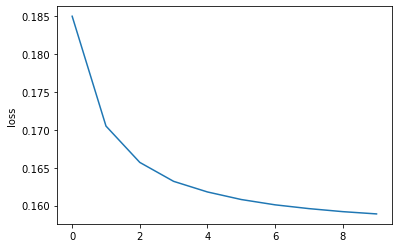

In [85]:
plt.plot(np.array([185.0, 170.5, 165.7, 163.2, 161.8, 160.8, 160.1, 159.6, 159.2, 158.9])/1000)
plt.ylabel('loss')
plt.xlabel('epoch')

In [89]:
%reset?

0 tensor(1.7040, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
50 tensor(0.1805, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
100 tensor(0.1724, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
150 tensor(0.1508, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
200 tensor(0.1612, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
250 tensor(0.1634, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
300 tensor(0.1508, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
350 tensor(0.1514, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
400 tensor(0.1549, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
450 tensor(0.1706, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
500 tensor(0.1633, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
550 tensor(0.1505, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
600 tensor(0.1573, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
650 tensor(0.1565, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
700 tensor(0.1483, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
750 tensor(0.1505, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0255, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward0>)

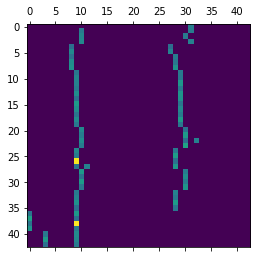

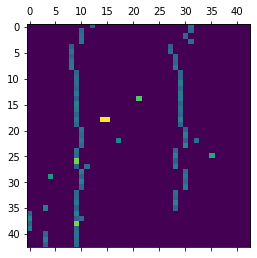

In [212]:
plt.matshow(b221[1].reshape(43, 43))
plt.matshow(a221[1])

In [76]:
sampev[0:500]

tensor([[ 2.7330e-39],
        [ 3.6729e-34],
        [ 3.2160e-31],
        [ 1.9208e-30],
        [ 9.5944e-31],
        [ 2.1048e-31],
        [ 4.5791e-32],
        [ 9.8849e-33],
        [ 2.1160e-33],
        [ 4.4933e-34],
        [ 9.4758e-35],
        [ 1.9890e-35],
        [ 4.1600e-36],
        [ 8.6724e-37],
        [ 1.8009e-37],
        [ 3.7228e-38],
        [ 7.6572e-39],
        [ 1.5668e-39],
        [ 3.1914e-40],
        [ 6.4817e-41],
        [ 1.3170e-41],
        [ 2.6815e-42],
        [ 5.4738e-43],
        [ 1.1182e-43],
        [ 2.2834e-44],
        [ 4.6544e-45],
        [ 9.4637e-46],
        [ 1.9192e-46],
        [ 3.8842e-47],
        [ 7.8604e-48],
        [ 1.5912e-48],
        [ 3.2214e-49],
        [ 6.5113e-50],
        [ 1.3140e-50],
        [ 2.6483e-51],
        [ 5.3347e-52],
        [ 1.0739e-52],
        [ 2.1606e-53],
        [ 4.3430e-54],
        [ 2.0387e-54],
        [ 1.2114e-53],
        [ 1.1243e-50],
        [ 1.6029e-45],
        [ 8

<ipython-input-75-195ec208b4ec>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(xnodes[100])


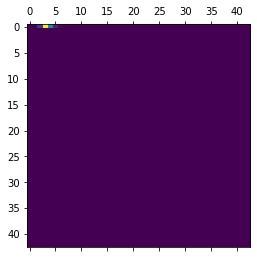

In [75]:
x1 = torch.tensor(xnodes[100])
data1 = Data(x=x1, edge_index=edge_index)
sampev = torch.Tensor.cpu(model(data1.x.to(device), data.edge_index.to(device)))
plt.matshow(sampev.reshape(43, 43).detach().numpy())

In [62]:
data1.num_node_features

4

In [191]:
torch.tensor(b221[i]).shape

torch.Size([1849])

In [192]:
model(datai.x, datai.edge_index)[0].reshape(43*43).shape

torch.Size([1849])

In [200]:
criterion(torch.tensor([1, 4]), torch.tensor([8,7]))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [169]:
b221[10]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# 2d view of the graph before training.
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

TypeError: ignored

In [ ]:
# Training
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h



In [ ]:
# 2d view of the graph after training.
for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

# Practices

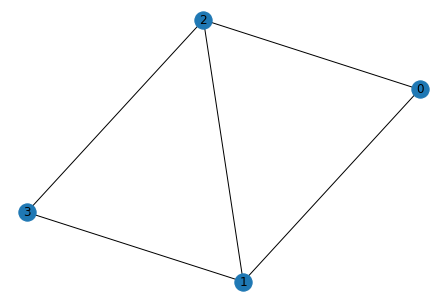

In [138]:
import networkx as nx
#G1 = nx.grid_graph(dim=[6, 6])
G2 = nx.generators.lattice.triangular_lattice_graph(5, 5, periodic=False)
G3 = nx.hexagonal_lattice_graph(5,5)
G4 = nx.grid_graph(dim=(range(7, 9), range(3, 6)))
G5 = nx.diamond_graph(create_using=None)
nx.draw(G5, with_labels=True)

[((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 0), (2, 1)), ((2, 1), (2, 2))] [((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((3, 0), (4, 0)), ((3, 0), (3, 1)), ((3, 1), (4, 1)), ((3, 1), (3, 2)), ((3, 2), (4, 2)), ((4, 0), (5, 0)), ((4, 0), (4, 1)), ((4, 1), (5, 1)), ((4, 1), (4, 2)), ((4, 2), (5, 2)), ((5, 0), (5, 1)), ((5, 1), (5, 2))]


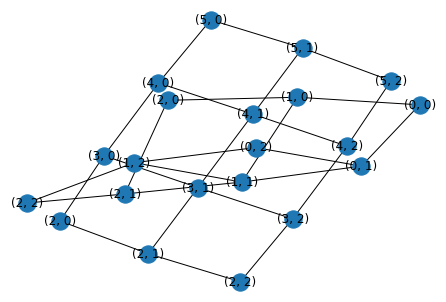

In [165]:
G4 = nx.grid_graph(dim=(range(0, 3), range(0, 3)))
G6 = nx.grid_graph(dim=(range(0, 3), range(2, 6)))
#G6.add_nodes_from(G4)
#G6.add_edges_from(G4)
print(G4.edges, G6.edges)
nx.draw(G4, with_labels=True)
nx.draw(G6, with_labels=True)

In [ ]:
nx.grid_graph(dim=(range(0, 3), range(0, 3)))

[((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 0), (2, 1)), ((2, 1), (2, 2))] [((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((3, 0), (4, 0)), ((3, 0), (3, 1)), ((3, 1), (4, 1)), ((3, 1), (3, 2)), ((3, 2), (4, 2)), ((4, 0), (5, 0)), ((4, 0), (4, 1)), ((4, 1), (5, 1)), ((4, 1), (4, 2)), ((4, 2), (5, 2)), ((5, 0), (5, 1)), ((5, 1), (5, 2))]


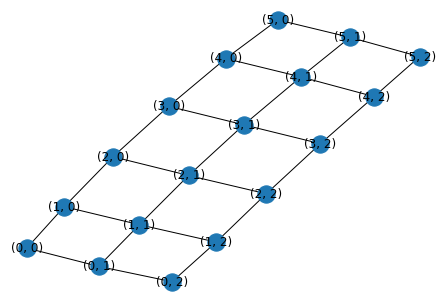

In [167]:
print(G4.edges, G6.edges)
G7 = nx.Graph()
G8 = ([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((1, 0), (2, 0)), \
                   ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 0), (2, 1)), ((2, 1), (2, 2)), \
                   ((0, 3), (1, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((0, 4), (0, 5)), ((0, 5), (1, 5)), ((1, 3), (2, 3)), \
                   ((1, 3), (1, 4)), ((1, 4), (2, 4)), ((1, 4), (1, 5)), ((1, 5), (2, 5)), ((2, 3), (2, 4)), ((2, 4), (2, 5)),])
G7.add_edges_from([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), \
                   ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), \
                   ((2, 0), (2, 1)), ((2, 1), (2, 2)), ((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), \
                   ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((3, 0), (4, 0)), ((3, 0), (3, 1)), ((3, 1), (4, 1)), \
                   ((3, 1), (3, 2)), ((3, 2), (4, 2)), ((4, 0), (5, 0)), ((4, 0), (4, 1)), ((4, 1), (5, 1)), \
                   ((4, 1), (4, 2)), ((4, 2), (5, 2)), ((5, 0), (5, 1)), ((5, 1), (5, 2))])
nx.draw(G7, with_labels=True)

In [177]:
G7.adj

AdjacencyView({(0, 0): {(1, 0): {}, (0, 1): {}}, (1, 0): {(0, 0): {}, (2, 0): {}, (1, 1): {}}, (0, 1): {(0, 0): {}, (1, 1): {}, (0, 2): {}}, (1, 1): {(0, 1): {}, (1, 0): {}, (2, 1): {}, (1, 2): {}}, (0, 2): {(0, 1): {}, (1, 2): {}}, (1, 2): {(0, 2): {}, (1, 1): {}, (2, 2): {}}, (2, 0): {(1, 0): {}, (2, 1): {}, (3, 0): {}}, (2, 1): {(1, 1): {}, (2, 0): {}, (2, 2): {}, (3, 1): {}}, (2, 2): {(1, 2): {}, (2, 1): {}, (3, 2): {}}, (3, 0): {(2, 0): {}, (4, 0): {}, (3, 1): {}}, (3, 1): {(2, 1): {}, (3, 0): {}, (4, 1): {}, (3, 2): {}}, (3, 2): {(2, 2): {}, (3, 1): {}, (4, 2): {}}, (4, 0): {(3, 0): {}, (5, 0): {}, (4, 1): {}}, (4, 1): {(3, 1): {}, (4, 0): {}, (5, 1): {}, (4, 2): {}}, (4, 2): {(3, 2): {}, (4, 1): {}, (5, 2): {}}, (5, 0): {(4, 0): {}, (5, 1): {}}, (5, 1): {(4, 1): {}, (5, 0): {}, (5, 2): {}}, (5, 2): {(4, 2): {}, (5, 1): {}}})

In [ ]:
# import pandas as pd
df_tra = pd.DataFrame(a_tra.reshape(80000, 43*43))
df_tra.shape

In [43]:
x.expand(-1, 10).shape

torch.Size([1849, 10])

In [51]:
x.shape

torch.Size([1849, 1])

In [53]:
xxx = x.expand(-1, 5)
xxx[:,1] = 

tensor([0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 1.8460e+03, 1.8470e+03,
        1.8480e+03])

In [50]:
a123 = torch.tensor(np.arange(10).reshape(10,1))
a123 = a123.expand(-1, 5)
a123

tensor([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9]], dtype=torch.int32)

In [29]:
a123.reshape(10, 4, 3, 2)

tensor([[[[0, 1],
          [2, 3],
          [4, 5]],

         [[6, 7],
          [8, 9],
          [0, 1]],

         [[2, 3],
          [4, 5],
          [6, 7]],

         [[8, 9],
          [0, 1],
          [2, 3]]],


        [[[4, 5],
          [6, 7],
          [8, 9]],

         [[0, 1],
          [2, 3],
          [4, 5]],

         [[6, 7],
          [8, 9],
          [0, 1]],

         [[2, 3],
          [4, 5],
          [6, 7]]],


        [[[8, 9],
          [0, 1],
          [2, 3]],

         [[4, 5],
          [6, 7],
          [8, 9]],

         [[0, 1],
          [2, 3],
          [4, 5]],

         [[6, 7],
          [8, 9],
          [0, 1]]],


        [[[2, 3],
          [4, 5],
          [6, 7]],

         [[8, 9],
          [0, 1],
          [2, 3]],

         [[4, 5],
          [6, 7],
          [8, 9]],

         [[0, 1],
          [2, 3],
          [4, 5]]],


        [[[6, 7],
          [8, 9],
          [0, 1]],

         [[2, 3],
          [4, 5],
    

In [51]:
a123

tensor([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],

        [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]], dtype=torch.int32)

In [53]:
a123[1, 1]

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)

In [4]:
import numpy as np
fgd1 = np.arange(0, 5)
fgd1

array([0, 1, 2, 3, 4])

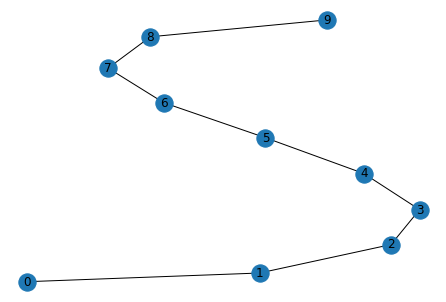

In [ ]:
import networkx as nx
G = nx.path_graph(10)
nx.draw(G, with_labels=True)

In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(x)
G.add_edges_from(set_edge_index)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

nx.draw_circular(G)
ax = plt.gca()
ax.set_aspect('equal')

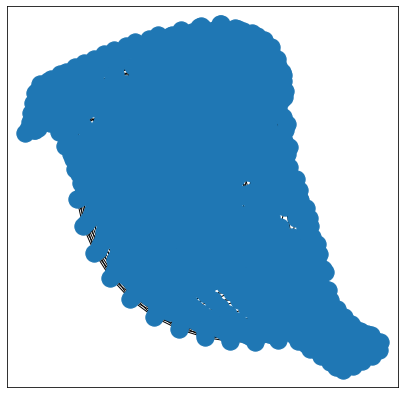

In [ ]:
from torch_geometric.utils import to_networkx
from IPython.display import Javascript  # Restrict height of output cell.
import networkx as nx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [ ]:
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

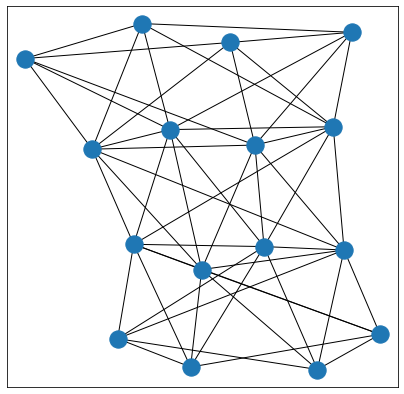

In [ ]:
from torch_geometric.utils import to_networkx
from IPython.display import Javascript  # Restrict height of output cell.
import networkx as nx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

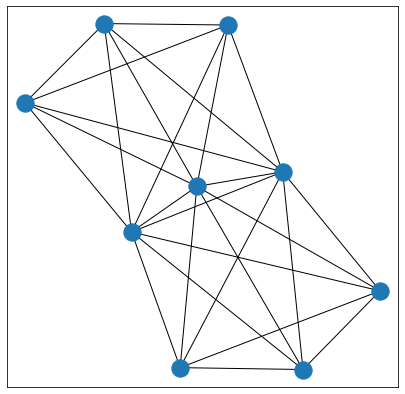

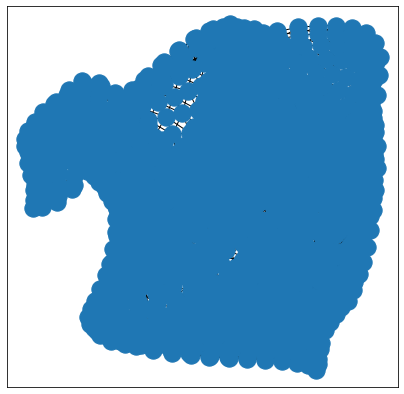

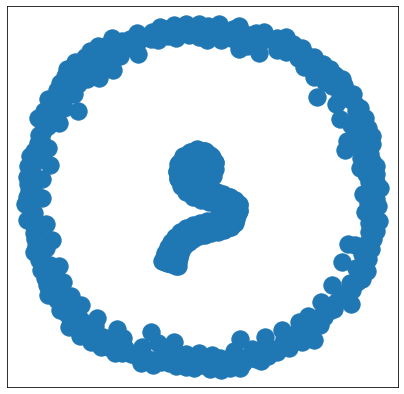

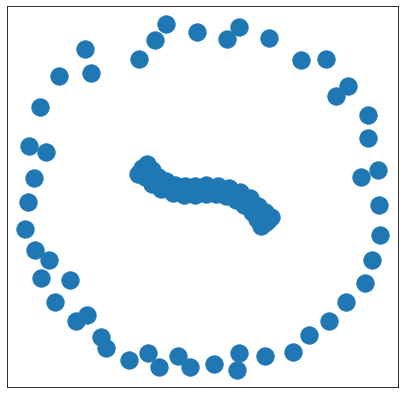

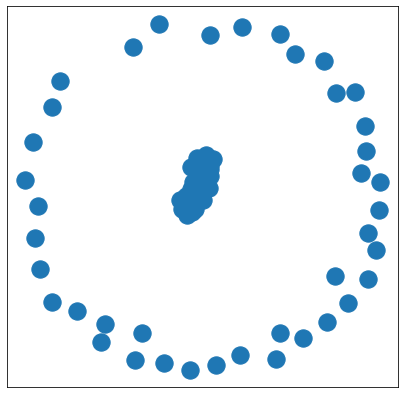

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print ("torch version =", torch.__version__, "\ncuda is available:", torch.cuda.is_available())
torch.cuda.empty_cache()

from google.colab import drive
drive.mount('/content/drive')

#model_save_name = 'classifier.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(model.state_dict(), path)
!nvidia-smi
!drive.mount("/content/drive", force_remount=True)

torch version = 1.8.0+cu111 
cuda is available: True


ModuleNotFoundError: ignored

In [ ]:
!ls /content/drive/MyDrive/'Colab Notebooks'

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
/Research/jupyternotebook/bhabha-files/trainmatrix80d2tnbsmt.npy